<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

## Finance and Python Syntax

In [1]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [2]:
from numpy import *

I = 100000

random.seed(1000)
z = random.standard_normal(I)
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

In [3]:
print "Value of the European Call Option %5.3f" % C0

Value of the European Call Option 9.149


## Time-to-Results

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web

In [5]:
goog = web.DataReader('GOOG', data_source='google',
                      start='3/14/2009', end='4/14/2014')
goog.index.name = u'Date'
goog.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406.0
2014-04-09,559.62,565.37,552.95,564.14,3324742.0
2014-04-10,565.00,565.00,539.90,540.95,4027743.0
2014-04-11,532.55,540.00,526.53,530.60,3916171.0
2014-04-14,538.25,544.10,529.56,532.52,2568020.0


In [6]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = goog['Log_Ret'].rolling(window=252, center=False).std() * np.sqrt(252)

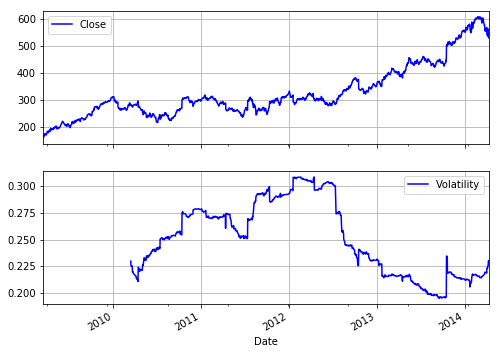

In [7]:
%matplotlib inline
goog[['Close', 'Volatility']].plot(subplots=True, color='blue',
                                   figsize=(8, 6), grid=True);
# tag: goog_vola
# title: Google closing prices and yearly volatility

## Paradigm

In [8]:
loops = 25000000
from math import *
a = range(1, loops)
def f(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

1 loop, best of 3: 13.5 s per loop


In [9]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

1 loop, best of 3: 1.39 s per loop


In [10]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

1 loop, best of 3: 575 ms per loop


In [11]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

1 loop, best of 3: 273 ms per loop


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>